1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima.

In [152]:
import pandas as pd
import numpy as np
import datetime

In [153]:
df_obesity = pd.read_csv("obesity-cleaned.csv", index_col=0)

In [154]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.8+ KB


In [155]:
df_obesity

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [156]:
df_obesity["Year"]

0        1975
1        1975
2        1975
3        1976
4        1976
         ... 
24565    2015
24566    2015
24567    2016
24568    2016
24569    2016
Name: Year, Length: 24570, dtype: int64

In [157]:
df_obesity["Obesity (%)"].str.split(" ", n=1, expand=True)

,0,1
0,0.5,[0.2-1.1]
1,0.2,[0.0-0.6]
2,0.8,[0.2-2.0]
3,0.5,[0.2-1.1]
4,0.2,[0.0-0.7]
...,...,...
24565,4.5,[2.4-7.6]
24566,24.8,[18.9-31.3]
24567,15.5,[12.0-19.2]
24568,4.7,[2.5-8.0]


In [158]:
# to_frame() ou []
#Esse método tranforma uma series em DataFrame

In [159]:
type(df_obesity["Sex"])

pandas.core.series.Series

In [160]:
type(df_obesity["Sex"].to_frame())

pandas.core.frame.DataFrame

In [161]:
# transpose
#Ela coloca os índices como colunas

In [162]:
df_obesity[["Sex"]].transpose()

,0,1,2,3,4,5,6,7,8,9,...,24560,24561,24562,24563,24564,24565,24566,24567,24568,24569
Sex,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female


In [163]:
#Shift
df_obesity[["Year"]].shift(1)

,Year
0,NaN
1,1975.0
2,1975.0
3,1975.0
4,1976.0
...,...
24565,2015.0
24566,2015.0
24567,2015.0
24568,2016.0


In [164]:
df_obesity[["Year"]] - df_obesity[["Year"]].shift(1)
#Com essa função podemos fazer a diferença dos valores nas colunas, éimportante para funções com delta

,Year
0,NaN
1,0.0
2,0.0
3,1.0
4,0.0
...,...
24565,0.0
24566,0.0
24567,1.0
24568,0.0


In [165]:
#isin() essa função retorna True e False para os valores que passamos
df_obesity["Year"].isin([1900, 1901, 1975])

0         True
1         True
2         True
3        False
4        False
         ...  
24565    False
24566    False
24567    False
24568    False
24569    False
Name: Year, Length: 24570, dtype: bool

In [166]:
#values retorna os valores
df_obesity["Year"].values

array([1975, 1975, 1975, ..., 2016, 2016, 2016], dtype=int64)

In [167]:
#iterrows Essa função é interessante para o uso de for, porém para conjuntos de dados pequenos
for idx, row in df_obesity.iterrows():
    print(idx, row[["Country", "Year"]])
    break

0 Country    Afghanistan
Year              1975
Name: 0, dtype: object


In [168]:
df_obesity.set_index("Year").head()

,Country,Obesity (%),Sex
Year,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes
1975,Afghanistan,0.2 [0.0-0.6],Male
1975,Afghanistan,0.8 [0.2-2.0],Female
1976,Afghanistan,0.5 [0.2-1.1],Both sexes
1976,Afghanistan,0.2 [0.0-0.7],Male


In [169]:
#to_dict
#Foi criado um dicionário onde o ano virou um índice e também a chave dos valores que são as colunas
df_obesity.set_index("Year").to_dict()["Country"]

{1975: 'Zimbabwe',
 1976: 'Zimbabwe',
 1977: 'Zimbabwe',
 1978: 'Zimbabwe',
 1979: 'Zimbabwe',
 1980: 'Zimbabwe',
 1981: 'Zimbabwe',
 1982: 'Zimbabwe',
 1983: 'Zimbabwe',
 1984: 'Zimbabwe',
 1985: 'Zimbabwe',
 1986: 'Zimbabwe',
 1987: 'Zimbabwe',
 1988: 'Zimbabwe',
 1989: 'Zimbabwe',
 1990: 'Zimbabwe',
 1991: 'Zimbabwe',
 1992: 'Zimbabwe',
 1993: 'Zimbabwe',
 1994: 'Zimbabwe',
 1995: 'Zimbabwe',
 1996: 'Zimbabwe',
 1997: 'Zimbabwe',
 1998: 'Zimbabwe',
 1999: 'Zimbabwe',
 2000: 'Zimbabwe',
 2001: 'Zimbabwe',
 2002: 'Zimbabwe',
 2003: 'Zimbabwe',
 2004: 'Zimbabwe',
 2005: 'Zimbabwe',
 2006: 'Zimbabwe',
 2007: 'Zimbabwe',
 2008: 'Zimbabwe',
 2009: 'Zimbabwe',
 2010: 'Zimbabwe',
 2011: 'Zimbabwe',
 2012: 'Zimbabwe',
 2013: 'Zimbabwe',
 2014: 'Zimbabwe',
 2015: 'Zimbabwe',
 2016: 'Zimbabwe'}

## Perguntas - Obesity among adults by country, 1975-2016

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [170]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x: x.split(" ")[0])
#Dividiu a coluna e puxou os dados somente da primeira divisão

In [171]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity.dropna(inplace=True)

In [172]:
df_obesity["Obesity"]

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24066, dtype: object

In [173]:
df_obesity[["Obesity"]] = df_obesity[["Obesity"]].astype(float)


In [174]:
df_obesity["Obesity"]

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24066, dtype: float64

In [175]:
del df_obesity["Obesity (%)"]

In [176]:
df_obesity['Year'].apply(lambda x: float(x))
#Transforma um int em um float

0        1975.0
1        1975.0
2        1975.0
3        1976.0
4        1976.0
          ...  
24565    2015.0
24566    2015.0
24567    2016.0
24568    2016.0
24569    2016.0
Name: Year, Length: 24066, dtype: float64

In [177]:
df_obesity

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2
...,...,...,...,...
24565,Zimbabwe,2015,Male,4.5
24566,Zimbabwe,2015,Female,24.8
24567,Zimbabwe,2016,Both sexes,15.5
24568,Zimbabwe,2016,Male,4.7


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [178]:
df_obesity.set_index("Year", inplace=True)
#Transformou o Ano em um índice

In [179]:
df_obesity

,Country,Sex,Obesity
Year,,,
1975,Afghanistan,Both sexes,0.5
1975,Afghanistan,Male,0.2
1975,Afghanistan,Female,0.8
1976,Afghanistan,Both sexes,0.5
1976,Afghanistan,Male,0.2
...,...,...,...
2015,Zimbabwe,Male,4.5
2015,Zimbabwe,Female,24.8
2016,Zimbabwe,Both sexes,15.5


In [180]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean()
#Usamos o groupby direto pois há somente uma métrica 

C:\Users\igoro\AppData\Local\Temp\ipykernel_16456\1128010721.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [181]:
df_obesity_Inicio = df_obesity[df_obesity.index == 1975]
df_obesity_Final = df_obesity[df_obesity.index == 2016]
#Criamos as variáveis com o menor ano e o maior
df_obesity_Inicio.set_index("Country", inplace=True)
df_obesity_Final.set_index("Country", inplace=True)
#Setamos os índices com o país

In [182]:
df_obesity_Res = df_obesity_Final[df_obesity_Final["Sex"] == "Both sexes"]["Obesity"] - df_obesity_Inicio[df_obesity_Inicio["Sex"] == "Both sexes"]["Obesity"]

In [183]:
df_obesity_Res.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [184]:
df_obesity_Res.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [185]:
df_2015 = df_obesity[df_obesity.index == 2015]

In [186]:
df_2015[["Country", "Obesity"]].max()

Country    Zimbabwe
Obesity        63.1
dtype: object

In [187]:
display(df_2015.nlargest(5, 'Obesity'))
#Usando display podemos mostrar a quantidade que quisermos 

,Country,Sex,Obesity
Year,,,
2015,Nauru,Female,63.1
2015,Nauru,Both sexes,60.7
2015,Cook Islands,Female,58.8
2015,Palau,Female,58.4
2015,Nauru,Male,58.2


In [188]:
df_2015[["Country", "Obesity"]].min()

Country    Afghanistan
Obesity            1.5
dtype: object

In [189]:
display(df_2015.nsmallest(5, 'Obesity'))

,Country,Sex,Obesity
Year,,,
2015,Viet Nam,Male,1.5
2015,Uganda,Male,1.7
2015,Ethiopia,Male,1.8
2015,Rwanda,Male,1.8
2015,Eritrea,Male,1.9


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [190]:
df_Brasil = df_obesity[df_obesity["Country"] == "Brazil"]

<AxesSubplot: xlabel='Year'>

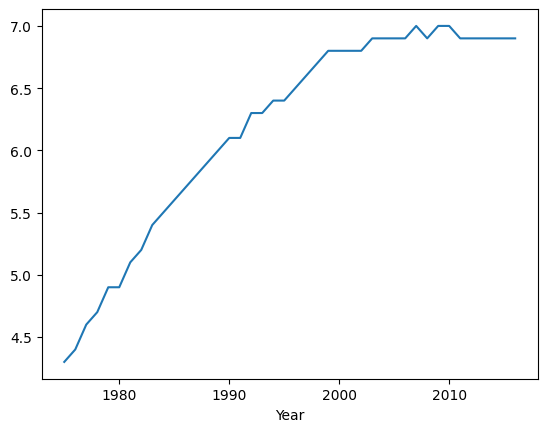

In [191]:
(df_Brasil[df_Brasil["Sex"] == "Female"]["Obesity"] - df_Brasil[df_Brasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [192]:
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]

<AxesSubplot: xlabel='Year'>

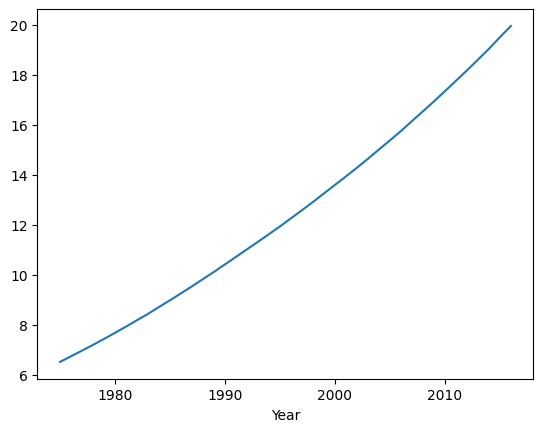

In [193]:
df_both.groupby("Year")["Obesity"].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [194]:
df_gdp = pd.read_csv("gdp.csv", decimal=".")

In [195]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [196]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))
#Foi feita a divisão dos itens na string, coloca-se o valor de -1 pois queremos o último valor

In [197]:
df_gdp["Year"]

0       1901
1       1906
2       1911
3       1916
4       1921
        ... 
4414    1991
4415    1996
4416    2001
4417    2006
4418    2011
Name: Year, Length: 4419, dtype: int64

In [198]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [199]:
'1,030.89'.replace(',', '')
#Com o replace tiramos a , geralmente usada na notação EUA

'1030.89'

In [200]:
df_gdp["GDP_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))
del df_gdp[" GDP_pp "]

In [201]:
df_gdp["GDP_pp"]

0       613.99
1       624.04
2       634.25
3       647.28
4       662.40
         ...  
4414    782.09
4415    781.50
4416    719.96
4417    520.17
4418    526.33
Name: GDP_pp, Length: 4419, dtype: float64

- Você conseguiria informar o primeiro valor registrado de cada país?

In [202]:
display(df_gdp.groupby("Country")["Year"].min())
#usando groupby, pegando a coluna country e pegando o valor mínimo de cada ano por país

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [203]:
df_gdp.groupby("Country")["Year"].min().value_counts()
#Com value_counts descobrimos se há outros valores mínimos

1901    192
1991      1
Name: Year, dtype: int64

In [204]:
df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min() == 1991]
#dentro de [] peguei a mesma operação do filtro e igualei a 1991

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [205]:
df_gdp[["Region", "GDP_pp", "Year"]][df_gdp["Year"]<2000].max()
#Verificamos o valor máximo abaixo do ano de 2000

Region    Sub-Saharan Africa
GDP_pp              118681.3
Year                    1996
dtype: object

In [206]:
df_gdp_Max = df_gdp[df_gdp["Year"] == 1901]
df_gdp_Min = df_gdp[df_gdp["Year"] == 1996]

In [207]:
((df_gdp_Min.groupby("Region")["GDP_pp"].mean() / df_gdp_Max.groupby("Region")["GDP_pp"].mean() - 1) * 100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: GDP_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [208]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


### Para preencher entre os anos primeiro criamos uma lista com todos os anos utilizando a biblioteca numpy

In [209]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())

In [210]:
arr_year

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [211]:
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
#Aqui criamos um dataframe com a coluna Year

In [212]:
df_all_years.index = df_all_years["Year"]
#Setamos a coluna Year como o índice

In [213]:
df_all_years

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [214]:
df_dyears_off = ~df_all_years["Year"].isin(df_gdp["Year"])
#Criamos uma função que verifica os anos que não estão presentes na tabela original
#Utilizando isin fazemos essa comparação e utilizando o ~ ao invés de retornar False vai retornar True

In [215]:
df_dyears_off

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [216]:
df_dyears_off = df_all_years.loc[df_dyears_off].index
#usando o loc nos pegamos os anos que não estão na lista

In [217]:
df_dyears_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [218]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

In [219]:
df_gdp["delta_gdp"] = df_gdp["GDP_pp"]- df_gdp["GDP_pp"].shift(1)
#Calculamos a variação de GDP utilizando o shift(1) para fazer o deslocamento da célula e subtrair o valor
df_gdp["delta_year"] = df_gdp["Year"]- df_gdp["Year"].shift(1)
#O mesmo ocorre para os anos
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)
#Fazendo essa operação nos temos a estimativa de variação ano a ano

In [220]:
df_gdp

,Country,Region,Year,GDP_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [221]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
#Essa coluna vai pegar o próximo ano
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [222]:
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [224]:
row

Country          Afghanistan
Year                    1975
Obesity (%)    0.5 [0.2-1.1]
Sex               Both sexes
Name: 0, dtype: object

In [225]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
#É colocado uma condição inicial para verficar o último ano
        continue
    #Assim que passar pela condição continua o if
    years_to_add = df_dyears_off[(df_dyears_off < row["next_year"]) & (df_dyears_off > row["Year"])]
    #Aqui nos verificamos a quantidade de anos que devemos adicionar
    for new_year in years_to_add:
        #Caso tiver um novo ano a adicionar o for continua
        add_row = row.copy()
        #É utilizado o copy pois se utilizar somente o row o python vai manipular o datafram origem
        add_row["GDP_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["GDP_pp"]
        #Com essa operação fazemos a estimativa
        #Fazemos a diferença de anos, multiplicado pela taxa anual somado a taxa atual
        add_row["Year"] = new_year
        #Atualizamos o ano
        add_row["kind"] = "estimated"
        #Colocamos uma descrição que este dado foi estimado
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])
        #Adicionamos ao dataframe original
        #Usou o to_frame pois ao final é gerado uma lista
        #O transpose é usado para transformar os dados em uma tabela

In [226]:
df_new_data.tail(10)

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
4415,Zimbabwe,Sub-Saharan Africa,1999,744.576,-12.308,2001.0,estimated
4415,Zimbabwe,Sub-Saharan Africa,2000,732.268,-12.308,2001.0,estimated
4416,Zimbabwe,Sub-Saharan Africa,2002,680.002,-39.958,2006.0,estimated
4416,Zimbabwe,Sub-Saharan Africa,2003,640.044,-39.958,2006.0,estimated
4416,Zimbabwe,Sub-Saharan Africa,2004,600.086,-39.958,2006.0,estimated
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,estimated


In [227]:
df_gdp = pd.concat([df_gdp, df_new_data])
#Juntamos os dois datasets

In [228]:
df_gdp.sort_values(["Country", "Year"], inplace=True)
#Ordenamos o dataframe pelo País e o ano

In [229]:
df_gdp.set_index(["Year"])
#Colocamos o ano como índice

,Country,Region,GDP_pp,gdp_year,next_year,kind
Year,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",613.99,2.01,1906.0,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,523.866,1.232,2011.0,estimated


In [230]:
df_gdp["kind"].fillna("real", inplace=True)
#Com o método  fillna nos valores nulos colocamos real

In [231]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,estimated


<AxesSubplot: xlabel='Year', ylabel='GDP_pp'>

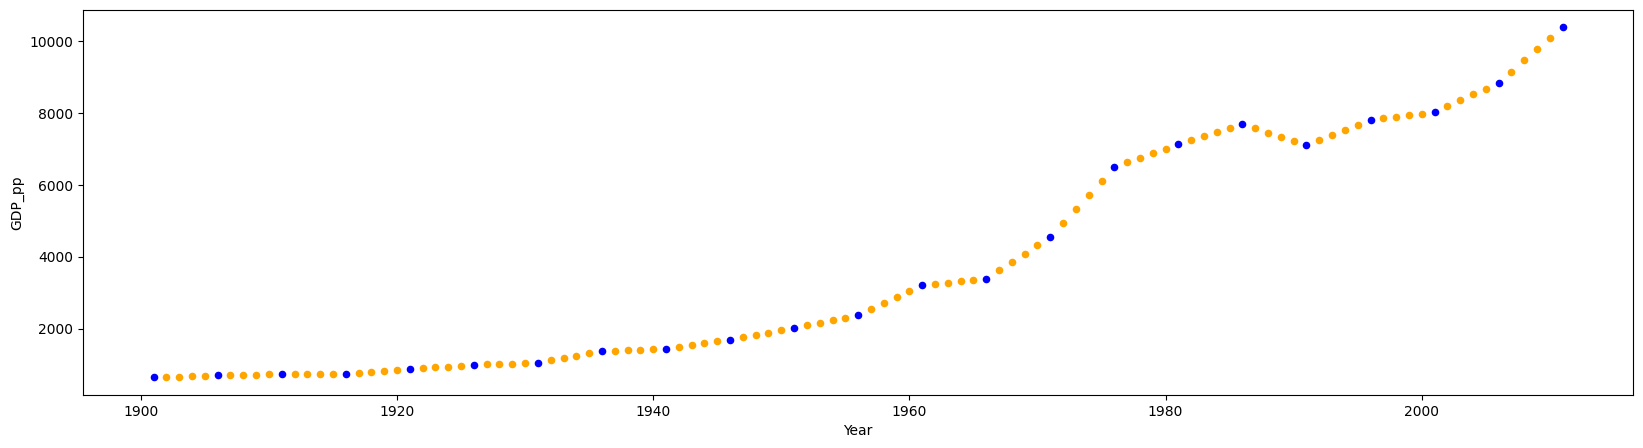

In [232]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == "Brazil")].plot(kind="scatter", y="GDP_pp", x="Year", ax=ax, color="blue")
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == "Brazil")].plot(kind="scatter", y="GDP_pp", x="Year", ax=ax, color="orange")

#Com a biblioteca plotly criamos um gráfico com os dados real e estimated

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [233]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp["GDP_pp"] = df_gdp["GDP_pp"].astype(float)

In [234]:
import plotly.express as px

df = px.data.gapminder()
#Importei a biblioteca plotly e um conjunto de dados
#Esse conjunto contém a coluna iso_alpha e iso_num importante para o gráfico

In [235]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [236]:
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
#Criamos uma variável com o dicionário entre o pais e a coluna iso_alpha para depois organizá-las de uma melhor forma

In [237]:
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}
#Método de enumeração de cada país, para posteriormente pegar os valores de iso_alpha
df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha)
#A partir do dicionário criado atribuimos a nova coluna 
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)
#Ocorre o mesmo na coluna iso_num

fig = px.choropleth(df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="GDP_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [238]:
df_obesity["country-year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()["Obesity"]

In [239]:
df_gdp["country-year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(x)).values
df_gdp["Obesity"] = df_gdp["country-year"].map(dict_obesity_year)

In [240]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2
4417,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2010,22.6


In [241]:
df_gdp_clean = df_gdp.dropna()

In [245]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "GDP_pp"]].mean().corr()

,Obesity,GDP_pp
Obesity,1.000000,0.969378
GDP_pp,0.969378,1.000000


In [247]:
countries = df_gdp_clean["Country"].unique()
#Usamos o unique para não atribuir países repetidos

In [249]:
corr_list = []
for country in countries:
    corr_list += [df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity", "GDP_pp"]].corr().iloc[0, 1]]

df_corr = pd.Series(corr_list, index=countries)

In [250]:
df_corr.mean()

0.5156020945367675

In [251]:
df_corr.std()

0.6523066623226486

<AxesSubplot: >

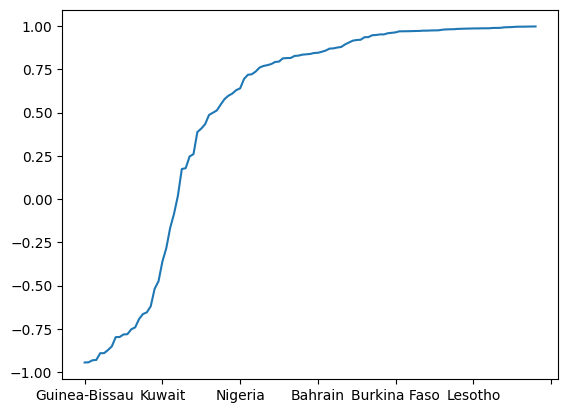

In [252]:
df_corr.sort_values().plot()

<AxesSubplot: >

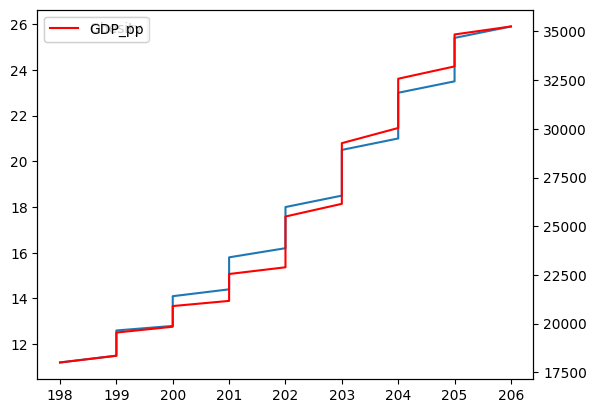

In [255]:
country = "Australia"
fig, ax = plt.subplots()
df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity"]].plot(ax=ax)
ax2 = ax.twinx()
df_gdp_clean[df_gdp_clean["Country"] == country][["GDP_pp"]].plot(ax=ax2, color="red")

In [256]:
df_gdp_clean

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
14,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4417,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2
